## Importing the required Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
sns.set(style="whitegrid", palette="muted")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm

import itertools
import re
import os

## Importing the Data

In [3]:
df1 = pd.read_csv('titan_train.csv')

In [4]:
df2 = pd.read_csv('titan_test.csv')

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df1.shape

(891, 12)

In [10]:
df2.shape

(418, 11)

In [11]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Cleaning

In [13]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df1.drop(['PassengerId'],axis=1,inplace=True)
df1.drop(['Ticket'],axis=1,inplace=True)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Clean Data

In [15]:
def clean_data(df):
    df1["fare"]=df1["fare"].fillna(df1["fare"].dropna().median())
    df1["age"]=df1["age"].fillna(df1["age"].dropna().median())
    
    df1.loc[df1["gender"]=="male","gender"]=0
    df1.loc[df1["gender"]=="female","gender"]=1
    
    
    df1["embarked"]=df1["embarked"].fillna("S")
    df1.loc[df1["embarked"]=="S","embarked"]=0
    df1.loc[df1["embarked"]=="C","embarked"]=1
    df1.loc[df1["embarked"]=="Q","embarked"]=2

In [16]:
df1.columns=["survived","pclass","name","gender","age","sibsp","parch","fare","cabin","embarked"]

In [17]:
df1.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'cabin', 'embarked'],
      dtype='object')

## To find the missing values in the data

In [18]:
df1.isnull().sum()

survived      0
pclass        0
name          0
gender        0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

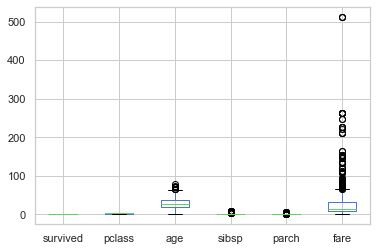

In [19]:
df1.boxplot()

d:\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


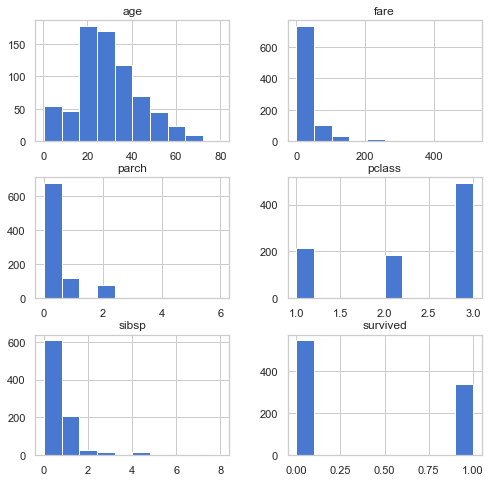

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df1.hist(ax=ax)
plt.show()

In [21]:
threshold = len(df1)*0.1

In [22]:
threshold

89.10000000000001

In [23]:
df1.dropna(thresh = threshold, axis=1, inplace=True)

In [24]:
df1.age.min()

0.42

In [25]:
df1.age.max()

80.0

## filling the null values 

In [26]:
print(df1.age.median())

28.0


In [27]:
def impute_median(series):
    return series.fillna(series.median())

In [28]:
df1.age = df1.age.transform(impute_median)

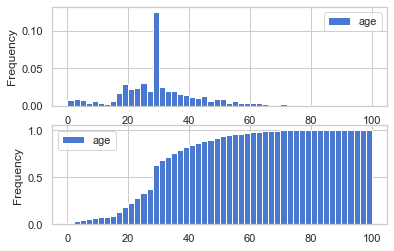

In [29]:
fig,axes=plt.subplots(nrows=2,ncols=1)
df1.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[0])
df1.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[1],cumulative=True)
plt.show()

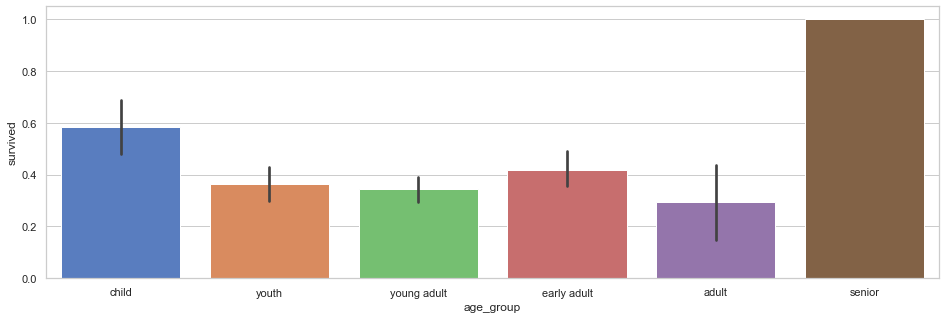

In [30]:
df1['age']=df1['age']
bins=[0,14,24,34,54,74,89]
labels=["child","youth","young adult","early adult","adult","senior"]
df1['age_group']=pd.cut(df1['age'],bins,labels=labels)
plt.figure(figsize=(16,5))
sns.barplot(x='age_group',y='survived',data=df1)
plt.show()

In [31]:
df1.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

## fill the missing embarked with value of the mode

In [32]:
df1['embarked'].fillna(str(df1["embarked"].mode().values[0]), inplace=True)

In [33]:
df1.age.min()

0.42

In [34]:
df1.age.max()

80.0

## fill the null values with appropriate values 

In [35]:
print(df1.age.median())

28.0


In [38]:
def impute_median(series):
    return series.fillna(series.median())

In [39]:
df1.age = df1.age.transform(impute_median)

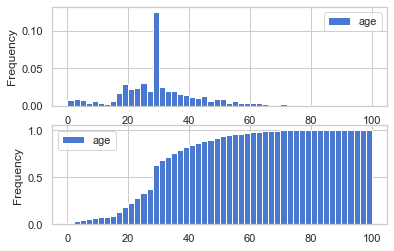

In [41]:
fig,axes=plt.subplots(nrows=2,ncols=1)
df1.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[0])
df1.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[1],cumulative=True)
plt.show()

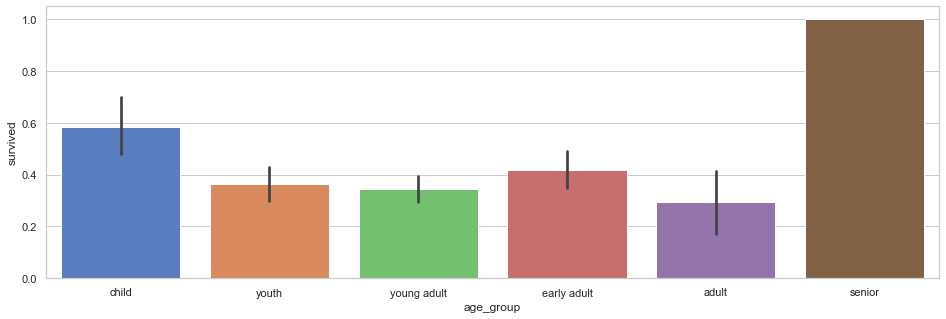

In [43]:
df1['age']=df1['age']
bins=[0,14,24,34,54,74,89]
labels=["child","youth","young adult","early adult","adult","senior"]
df1['age_group']=pd.cut(df1['age'],bins,labels=labels)
plt.figure(figsize=(16,5))
sns.barplot(x='age_group',y='survived',data=df1)
plt.show()

In [44]:
df1.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
print(df1["embarked"].mode())

0    S
dtype: object


In [47]:
## filling the missing embarked values with mode

df1["embarked"].fillna(str(df1["embarked"].mode().values[0]),inplace=True)

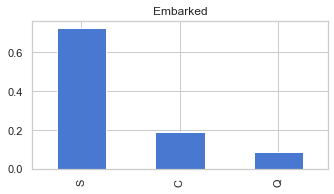

In [49]:
fig=plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(1,2))
df1.embarked.value_counts(normalize=True).plot(kind='bar',alpha=1)
plt.title("Embarked")
plt.show()

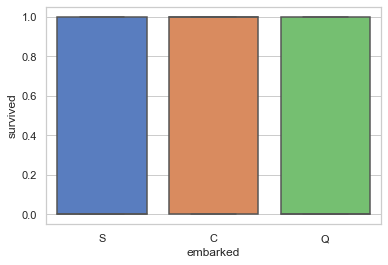

In [50]:
sns.boxplot(x='embarked', y='survived', data=df1)
plt.show()

In [51]:
print(df1.cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


## fill the missing cabin values with mode

In [53]:
df1["cabin"].fillna(str(df1["cabin"].mode().values[0]), inplace=True)

In [54]:
df1["cabin"]=df1["cabin"].apply(lambda x:str(x).replace(' ','')if ' ' in str(x) else str(x))

In [55]:
df1["cabin_data"] = df1["cabin"].isnull().apply(lambda x: not x)
df1["deck"] = df1["cabin"].str.slice(0,1)
df1["room"] = df1["cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
df1[df1["cabin_data"]].head()

,survived,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,age_group,cabin_data,deck,room
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96B98,S,youth,True,B,96.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,early adult,True,C,85.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96B98,S,young adult,True,B,96.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,early adult,True,C,123.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96B98,S,early adult,True,B,96.0


In [56]:
df1.drop(["cabin"], axis=1, inplace=True)
df1.drop(["cabin_data"], axis=1, inplace=True)
df1.drop(["room"], axis=1, inplace=True)

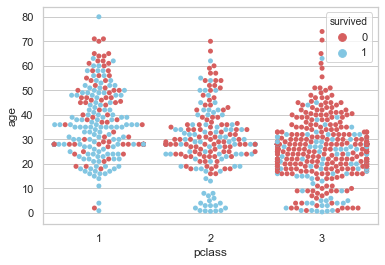

In [57]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="pclass", y="age", hue="survived", palette=["r","c","y"], data=df1)
plt.show()

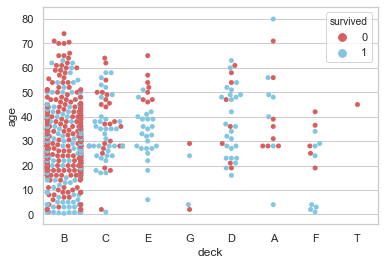

In [58]:
sns.swarmplot(x="deck", y="age", hue="survived",palette=["r","c","y"], data=df1 )
plt.show()

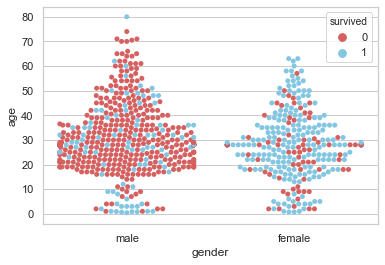

In [60]:
sns.swarmplot(x="gender", y="age", hue="survived",palette=["r", "c", "y"], data=df1)
plt.show()

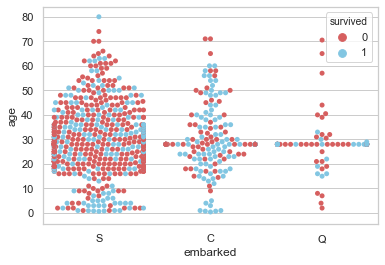

In [61]:
sns.swarmplot(x="embarked", y="age", hue="survived",
              palette=["r", "c", "y"], data=df1)
plt.show()

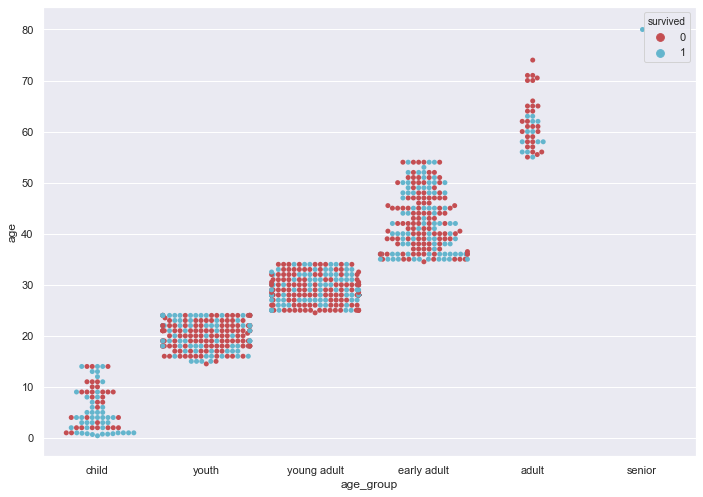

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.swarmplot(x="age_group", y="age", hue="survived", palette=["r", "c", "y"], data=df1)
plt.show()

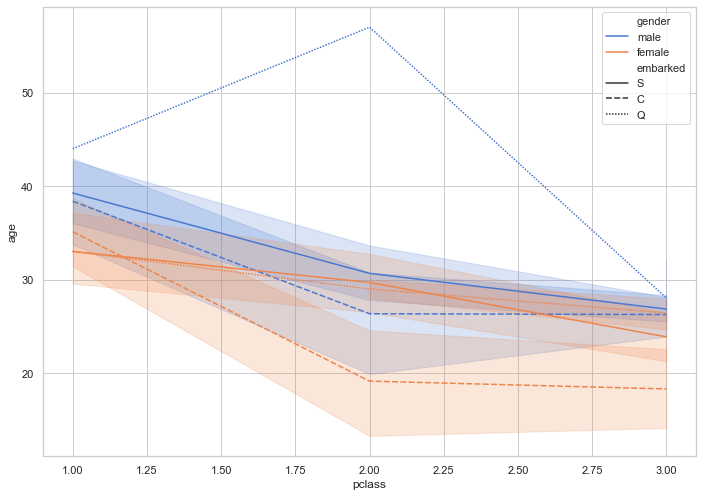

In [63]:
sns.set(style="whitegrid", palette="muted")
sns.lineplot(x="pclass", y="age",
             hue="gender", style="embarked",
             data=df1)
plt.show()